# Square Enix Purchase Data Analysis 

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

#Ignore all warnings 

import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [46]:
purchase_df = pd.read_excel("Case Study_Purchase Data (1).xlsx")

### Basic Information about the Data Set 

In [47]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          250 non-null    datetime64[ns]
 1   UserID        250 non-null    int64         
 2   itemCategory  250 non-null    object        
 3   itemPrice     250 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ KB


In [48]:
purchase_df.head()

,date,UserID,itemCategory,itemPrice
0,2025-01-23 04:33:42,53908613,Books,60
1,2025-01-17 23:57:02,72710441,Accessories,120
2,2025-01-18 23:48:37,35137612,Music,50
3,2025-01-06 19:00:10,68038425,Music,50
4,2025-01-10 22:43:30,34987764,Figurines,50


### Duplicate Entries

In [49]:
duplicate_count = purchase_df.duplicated().sum()
duplicate_count

3

There are three duplicate rows whcih need to be removed. 

### Summary Statistics

In [50]:
numerical_summary = purchase_df.describe()
numerical_summary

,date,UserID,itemPrice
count,250,2.500000e+02,250.000000
mean,2025-01-14 09:02:32.400000,4.943709e+07,56.720000
min,2025-01-01 01:11:09,1.101550e+05,10.000000
25%,2025-01-07 12:42:51,2.323668e+07,30.000000
50%,2025-01-14 12:03:51.500000,4.949033e+07,45.000000
75%,2025-01-20 16:13:16.750000128,7.473086e+07,60.000000
max,2025-01-28 17:48:55,9.927429e+07,200.000000
std,NaN,2.906279e+07,44.638683


### Count of Unique Users and Unique Item Categories 

In [51]:
unique_users = purchase_df['UserID'].nunique()
unique_users

235

In [52]:
unique_categories = purchase_df['itemCategory'].nunique()
unique_categories

8

### Count of Purchase Per Category

In [53]:
category_counts = purchase_df['itemCategory'].value_counts()
category_counts

itemCategory
Books              43
Accessories        39
Table Top Games    38
Plushies           30
Figurines          29
Music              27
Home Goods         24
Posters            20
Name: count, dtype: int64

### Remove Duplicates

In [54]:
purchase_df_cleaned = purchase_df.drop_duplicates()
purchase_df_cleaned.head()

,date,UserID,itemCategory,itemPrice
0,2025-01-23 04:33:42,53908613,Books,60
1,2025-01-17 23:57:02,72710441,Accessories,120
2,2025-01-18 23:48:37,35137612,Music,50
3,2025-01-06 19:00:10,68038425,Music,50
4,2025-01-10 22:43:30,34987764,Figurines,50


### Data Visualization

### Plot Distribution of Item Prices 

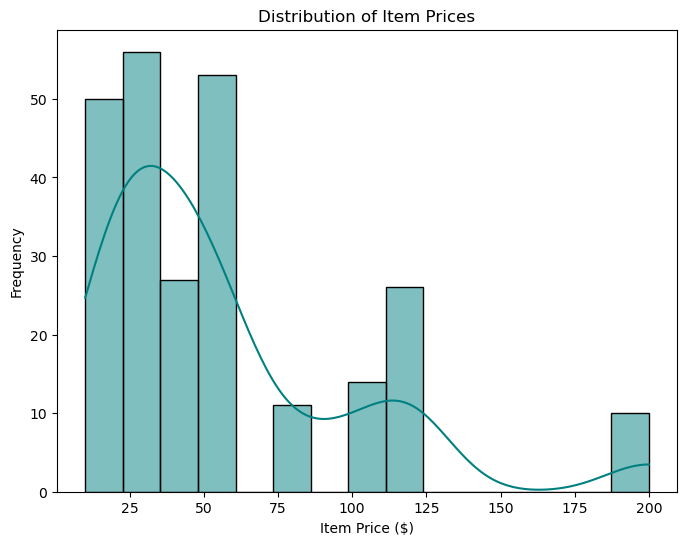

In [62]:
plt.figure(figsize=(8,6))
sns.histplot(purchase_df_cleaned['itemPrice'], bins=15, color='Teal', kde=True)
plt.xlabel("Item Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Item Prices")
plt.show()

### Plot purchases per category


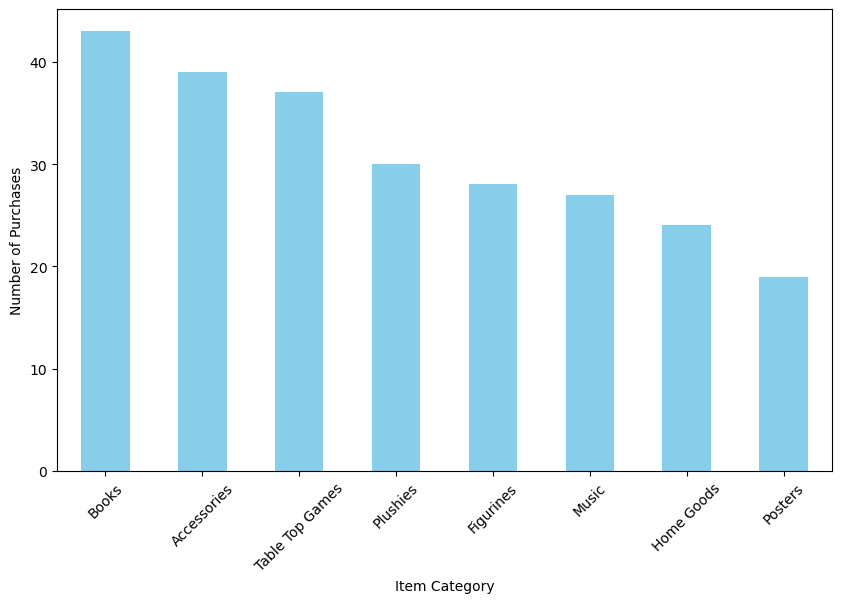

In [75]:
plt.figure(figsize=(10,6))
purchase_df_cleaned["itemCategory"].value_counts().plot(kind="bar", color="skyblue")
plt.xlabel("Item Category")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()


### Plot time series of purchases

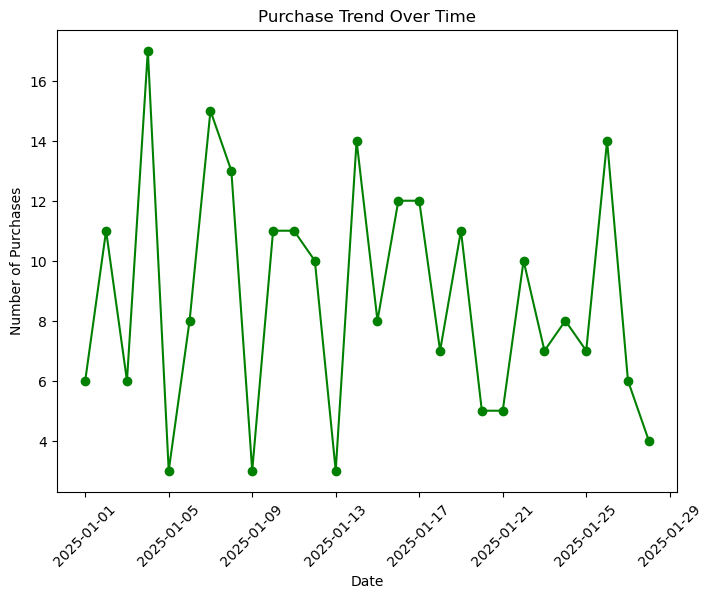

In [82]:
purchase_df_cleaned["date"] = pd.to_datetime(purchase_df_cleaned["date"])
purchase_df_cleaned["purchase_date"] = purchase_df_cleaned["date"].dt.date
purchases_per_day = purchase_df_cleaned.groupby("purchase_date").size()


plt.figure(figsize=(8,6))
plt.plot(purchases_per_day, marker="o", color="green")
plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.title("Purchase Trend Over Time")
plt.xticks(rotation=45)
plt.show()

Key Insights from Initial EDA:

Duplicate Entries: 
1. There are 3 duplicate entries in the dataset, which are removed.

Numerical Summary:
1. The UserID values range from 110,155 to 99,274,290.
2. ItemPrice values range from $10 to $200, with an average price of $56.72.


Unique Values:
1. There are 235 unique users who made purchases.
2. There are 8 unique item categories.

Most Popular Item Categories:
1. Books (43 purchases) and Accessories (39 purchases) are the most purchased categories.
2. The least purchased category is Posters (20 purchases).

### User Based Insights 

### Top 10 Spending Users

In [84]:
top_spending_users = purchase_df_cleaned.groupby("UserID")["itemPrice"].sum().sort_values(ascending=False).head(10)
top_spending_users

UserID
5731319     215
79552020    200
96132628    200
52042886    200
58401285    200
38565509    200
30879029    200
90679069    200
6638065     200
54461128    200
Name: itemPrice, dtype: int64

### Visualizing Top 10 Spending Users


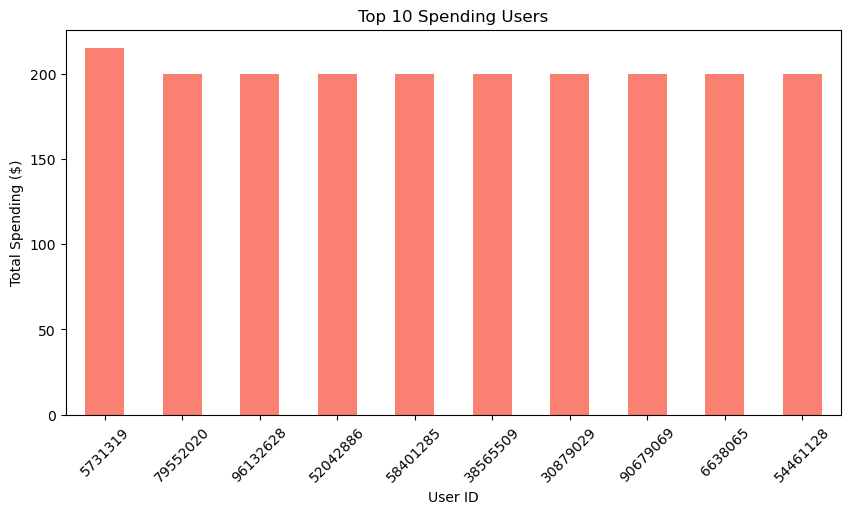

In [92]:
plt.figure(figsize=(10,5))
top_spending_users.plot(kind="bar", color='Salmon')
plt.xlabel("User ID")
plt.ylabel("Total Spending ($)")
plt.title("Top 10 Spending Users")
plt.xticks(rotation=45)
plt.show()


### Purchase Frequency Per User

In [87]:
purchase_frequency = purchase_df_cleaned["UserID"].value_counts()
purchase_frequency

UserID
19067975    2
50768949    2
24282232    2
65801741    2
20868086    2
           ..
56343087    1
49970631    1
46653748    1
24463194    1
6440012     1
Name: count, Length: 235, dtype: int64

### Visualizing Purchase Frequency Distribution


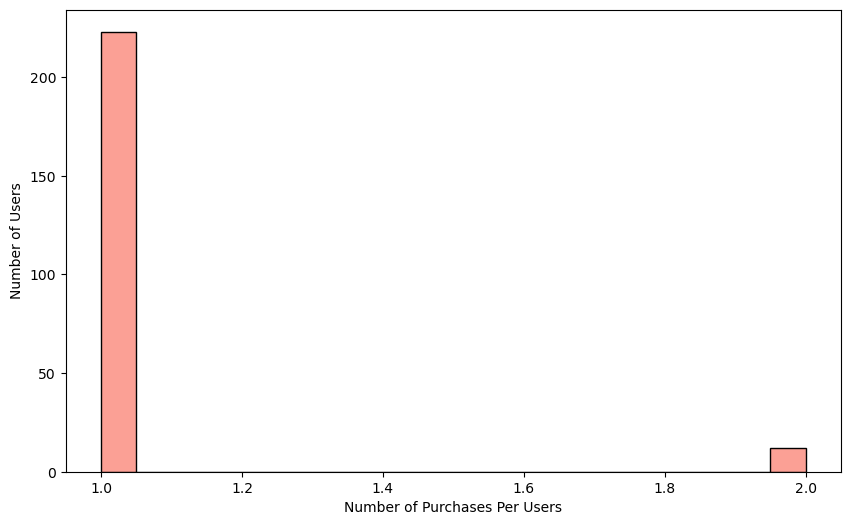

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(purchase_frequency, bins=20, color="Salmon")
plt.xlabel("Number of Purchases Per Users")
plt.ylabel("Number of Users")
plt.show()


### Average Spending Per User

In [91]:
average_spending = purchase_df_cleaned.groupby("UserID")["itemPrice"].mean()
average_spending

UserID
110155       40.0
1158599      30.0
1413160      15.0
1689358      20.0
2272228      30.0
            ...  
97603459     45.0
97950724    120.0
98094950     45.0
98210116    120.0
99274286     60.0
Name: itemPrice, Length: 235, dtype: float64

### Visualizing Average Spending Per User

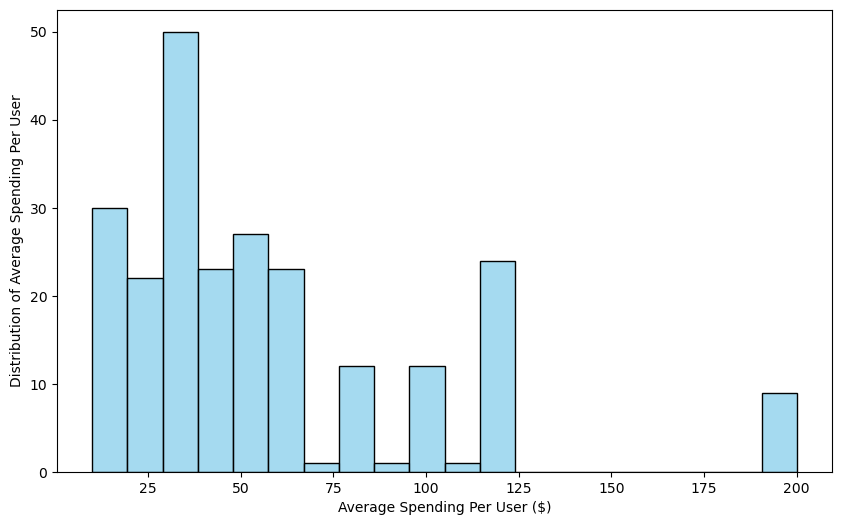

In [95]:
plt.figure(figsize=(10,6))
sns.histplot(average_spending, bins=20, color="skyblue")
plt.xlabel("Average Spending Per User ($)")
plt.ylabel("Distribution of Average Spending Per User")
plt.show()


User Based Insights 

Top 10 Spending Users:
1. The highest-spending user spent $215.
 

Purchase Frequency Distribution:
1. The majority of users made only one purchase.
2. A small number of users made two purchases, with no one exceeding that.


Average Spending per User:

1. The average spending per user is $56.38.
2. $10 is the Minimum purchase amount, while the highest single-user spending is $200.
3.  75% of users spend up to $77.50.


### Item Category Insights 

### Revenue Per Item Category

In [96]:
category_revenue = purchase_df.groupby("itemCategory")["itemPrice"].sum().sort_values(ascending=False)
category_revenue

itemCategory
Figurines          3550
Accessories        3040
Table Top Games    2730
Books              1605
Home Goods         1210
Music               820
Plushies            785
Posters             440
Name: itemPrice, dtype: int64

### Price Distribution Per Category

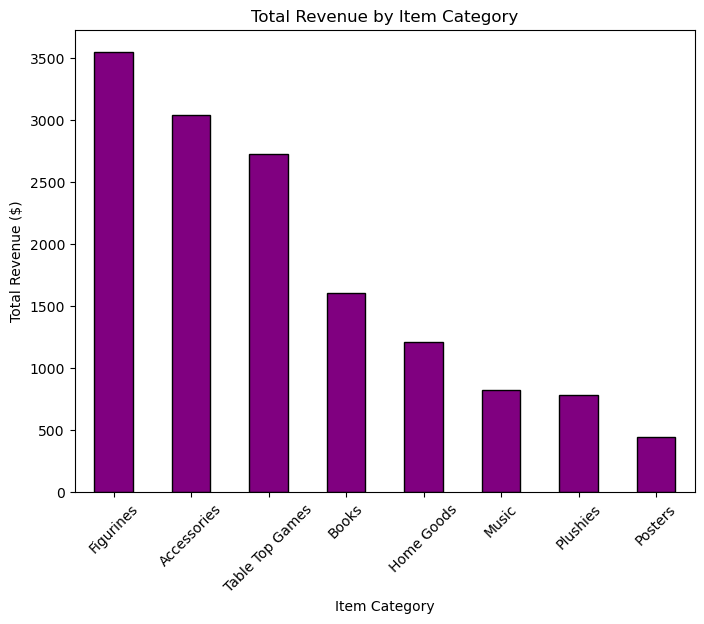

In [125]:
plt.figure(figsize=(8,6))
category_revenue.plot(kind="bar", color="purple", edgecolor="black")
plt.xlabel("Item Category")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenue by Item Category")
plt.xticks(rotation=45)
plt.show()

Item Category Insights:

1. Revenue per Category:

1. Figurines generate the highest revenue ($3,350),followed by Accessories ($3,040) and Table Top Games ($2,670).
2. Posters generate the least revenue ($430).

### Time Based Analysis 

In [114]:
 #Extract Time-related featu#res

purchase_df_cleaned["purchase_hour"] = pd.to_datetime(purchase_df_cleaned["date"]).dt.hour 
purchase_df_cleaned["purchase_weekday"] = pd.to_datetime(purchase_df_cleaned["date"]).dt.day_name()


In [115]:
# Purchases by Hour of the day

hourly_purchases = purchase_df_cleaned["purchase_hour"].value_counts().sort_index()


# Extract time-related features
purchase_df_cleaned["purchase_hour"] = pd.to_datetime(purchase_df_cleaned["date"]).dt.hour
purchase_df_cleaned["purchase_weekday"] = pd.to_datetime(purchase_df_cleaned["date"]).dt.day_name()


### Purchases by hour of the day

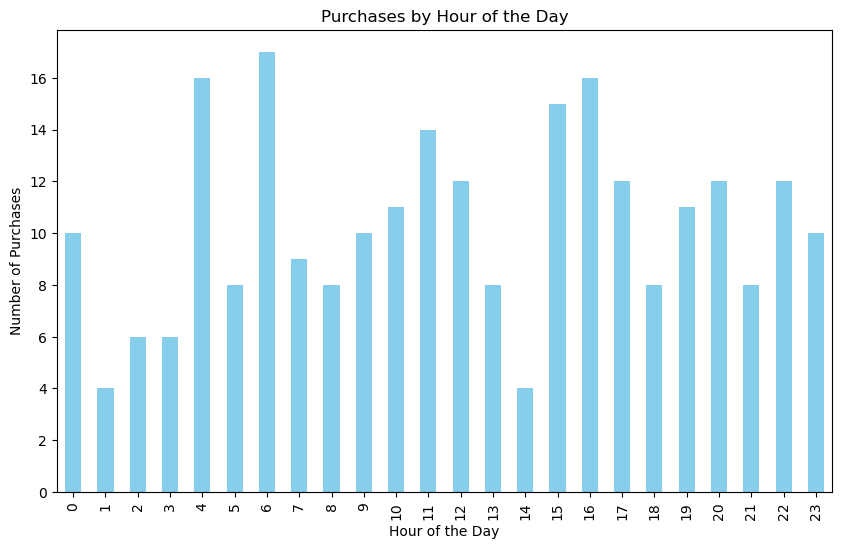

In [112]:
plt.figure(figsize=(10,6))
hourly_purchases.plot(kind="bar", color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Purchases")
plt.title("Purchases by Hour of the Day")
plt.show()

### Purchases by Day of the Week

In [118]:
weekday_purchases = purchase_df_cleaned["purchase_weekday"].value_counts()
weekday_purchases


purchase_weekday
Saturday     42
Sunday       38
Tuesday      38
Friday       37
Wednesday    37
Thursday     33
Monday       22
Name: count, dtype: int64

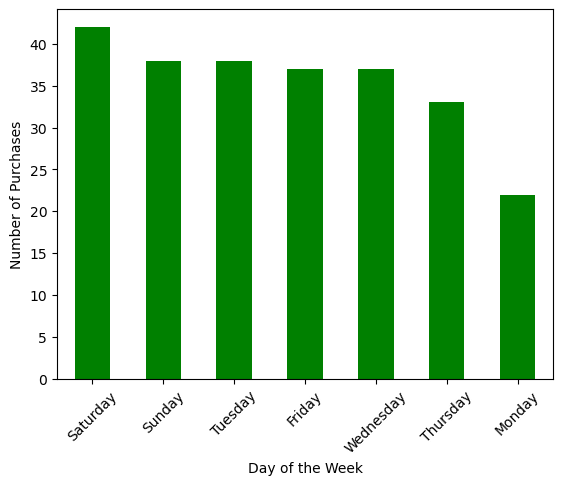

In [120]:
weekday_purchases.plot(kind="bar", color="green")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

### Monthly Revenue Trends 


In [124]:
purchase_df_cleaned["purchase_month"] = pd.to_datetime(purchase_df_cleaned["date"]).dt.to_period("M")
monthly_revenue = purchase_df_cleaned.groupby("purchase_month")["itemPrice"].sum()

monthly_revenue

purchase_month
2025-01    13910
Freq: M, Name: itemPrice, dtype: int64